**Using Machine Learning Models to Predict the Desirability of a Car**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim  as optim
from torchvision import datasets, models, transforms, utils
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

In [ ]:
class MultiLayerNN(nn.Module):
    def __init__(self, input_dim = 6, output_dim = 1):
        super(MultiLayerNN, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(6, 1),
        )
    def forward(self, input):
        output = self.linear_relu_stack(input)
        return output
     

In [ ]:
nn_clf = MultiLayerNN()

In [ ]:
outer = -1
inner = -1
index = -1
valueDict = {"vhigh": 4, "high": 3, "med": 2, "low": 1, "small": 1, "big": 3, "unacc": 0, "acc": 0, "good": 1, "vgood": 1, "5more": 5, "more": 4}
filename = "/content/car.csv"
outfile = pd.read_csv(filename)
x = outfile.iloc[0:1729, 0:6].values
for row in x:
  inner = -1
  outer += 1
  for value in row:
    inner += 1
    try:
      x[outer][inner] = valueDict[value]
    except:
      pass
y = outfile.iloc[0:1729, 6].values
yCounter = -1
for value in y:
  yCounter += 1
  try:
    y[yCounter] = valueDict[value]
  except:
    pass
sc = StandardScaler()
p = np.random.permutation(len(x))
x, y = x[p], y[p]
x_train = sc.fit_transform(x[0:1400])
y_train = y[0:1400]
x_test = x[1401:]
y_test = y[1401:]
y_train = np.array(y_train, dtype = np.float32)
x_train = torch.tensor(x_train, dtype = torch.float32)
y_train = torch.from_numpy(y_train)
x_test = np.array(x_test, dtype = np.float32)
x_test = torch.from_numpy(x_test)
y_test = np.array(y_test, dtype = np.float32)
y_test = torch.from_numpy(y_test)
loss_func = nn.MSELoss()
optimizer = None
optimizer = torch.optim.Adam(nn_clf.parameters(), lr =.01)
for epoch in range(1000):
  pred = nn_clf(x_train)
  loss = loss_func(pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
print("Training completed!")

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([1400])) that is different to the input size (torch.Size([1400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Training completed!


In [ ]:

# Accuracy
counter = 0
y_pred = nn_clf(x_test)
for i in range(len(y_pred)):
  y_pred[i] = y_pred[i].round()
  if y_pred[i] == y_test[i]:
    counter += 1
print(counter/len(y_pred))

0.9143730886850153


Decision Tree Model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


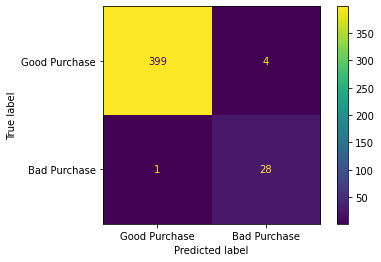

In [ ]:
xD = pd.DataFrame(x, columns = ["Buying", "Maint", "Doors", "Persons", "Luggage", "Safety"])
xD=xD.astype('float')
yD = pd.DataFrame(y, columns = ["Class"])
yD=yD.astype('float')
X_train, X_test, Y_train, Y_test = train_test_split(xD, yD)
dT = DecisionTreeClassifier()
dT = dT.fit(X_train, Y_train)
plot_confusion_matrix(dT, X_test, Y_test, display_labels = ["Good Purchase", "Bad Purchase"])

Decision Tree without Certain Features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


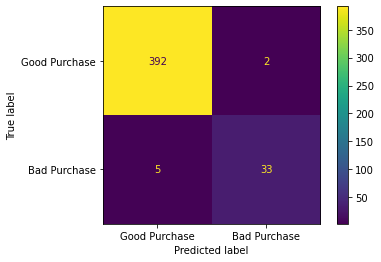

In [ ]:
xD = pd.DataFrame(x, columns = ["Buying", "Maint", "Doors", "Persons", "Luggage", "Safety"])
#Feel free to play around and delete certain features
# xD = xD.drop(["Luggage", "Doors"], axis = 1)
xD=xD.astype('float')
yD = pd.DataFrame(y, columns = ["Class"])
yD=yD.astype('float')
X_train, X_test, Y_train, Y_test = train_test_split(xD, yD, random_state = 40)
dT = DecisionTreeClassifier(random_state = 40)
dT = dT.fit(X_train, Y_train)
plot_confusion_matrix(dT, X_test, Y_test, display_labels = ["Good Purchase", "Bad Purchase"])

Average Person capacity per Door

In [ ]:
doorDict = {2: 0, 3: 0, 4: 0, 5: 0}
doorCount = {2: 0, 3: 0, 4: 0, 5: 0}
for item in x:
  doorDict[int(item[2])] += int(item[3])
  doorCount[int(item[2])] += 1
doorDict[2] = doorDict[2]/doorCount[2]
doorDict[3] = doorDict[3]/doorCount[3]
doorDict[4] = doorDict[4]/doorCount[4]
doorDict[5] = doorDict[5]/doorCount[5]
print(doorDict)

{2: 3.3333333333333335, 3: 3.3333333333333335, 4: 3.3333333333333335, 5: 3.3333333333333335}
